<ipython-input-98-80dbdb43c924>:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['resume_id'] = [i for i in range(0, len(df))]


typeee object
Total time taken in seconds: 0.443


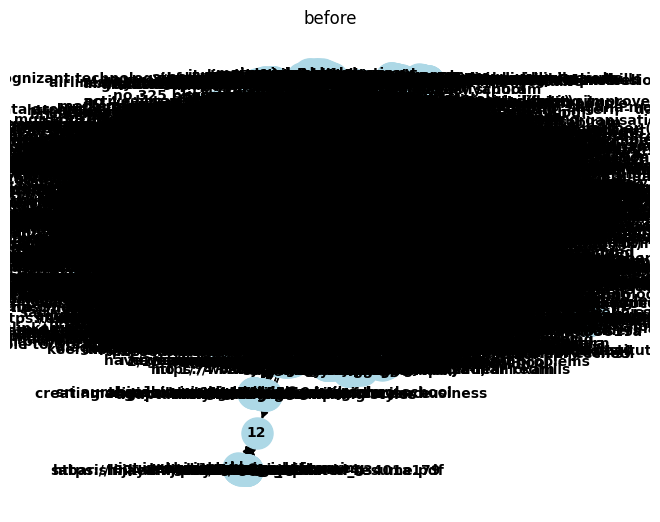

[0, 'karan ahuja', 'https://www.linkedin.com/in/karan-ahuja-1bb21617a', 'advance application engineering analyst', 4.0, 'central board of secondary education', 'cbse', 'mechanical engineering', 'national institute of technology', 'modern vidya niketan', 'vidya niketan school', 8571015682.0, 'karan.619.ahuja@gmail.com', '21263.pdf', '2c 68 nit', 'india', '121001', 'faridabad, haryana', 'c++', 'java', 'spring', 'object oriented programming', 'data structures and algorithms', 'database management systems', 'android app development system', 'web technologies', 'autocad', 'solidworks', 'communication', 'leadership qualities', 'teamwork', 'ability to build relations', 'outgoing nature', 'c++ master course', 'research & development internship', 'accenture', 'coding blocks', 'indian institute of technology', 'iit kanpur', 'india yamaha motor pvt. ltd', 1, 'sudarsaan a', 'https://www.linkedin.com/in/sudarsaan-a-9b378198', 'machine learning engineer', 5.0, 'information technology', 'rajalakshmi 

In [ ]:
import json
import time
from io import StringIO
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# from resources.handlers.zos.zosmanager import ZosManager
# from src.PurchaseAnalytics.reas.searchable_resume_app.utils_common import constants


def _add_node_and_edge(
        graph: nx.DiGraph,
        candidate_node: str,
        node_for_adding: str,
        node_type: str,
        candidate_to_node_relation: str,
        node_to_candidate_relation: str,
        predicted_value="",
        actual_value=""
):
    """
    Creates nodes and edges for the knowledge graph

    Parameters
    ----------
    graph: nx.DiGraph
        Contains the existing knowledge graph of resumes
    candidate_node: str
        Name of the candidate
    node_for_adding: str
        Name of node to be added
    node_type: str
        Type of node to be added
    candidate_to_node_relation: str
        Edge relation between candidate and node to be added
    node_to_candidate_relation: str
        Edge relation between node to be added and candidate

    Returns
    ----------
    graph: nx.DiGraph
        Updated knowledge graph of resumes
    """
    if not node_for_adding:
        return graph
    try:
        actual_name = node_for_adding
        if isinstance(node_for_adding, str):
            node_for_adding = node_for_adding.lower()

        if not graph.has_node(node_for_adding):
            graph.add_node(node_for_adding=node_for_adding, node_type=node_type, actual_name=actual_name,
                           predicted_value=predicted_value, actual_value=actual_value)

        graph.add_edge(u_of_edge=node_for_adding, v_of_edge=candidate_node, relation=node_to_candidate_relation)
        if candidate_to_node_relation:
            graph.add_edge(u_of_edge=candidate_node, v_of_edge=node_for_adding,
                           relation=candidate_to_node_relation)
        return graph

    except Exception as e:
        print(f'Skipping node creation for node: {node_for_adding}\n{e}')
        return graph

def construct_graph(df):
    """
    Constructs a knowledge graph from all the resumes.

    Parameters
    ----------
    df: pd.DataFrame
        Contains resume data of all candidates in a data frame

    Returns
    ---------
    graph: nx.DiGraph()
        Knowledge graph for the resumes
    """

    start_time = time.time()
    df = df.replace(np.nan, None)
    df['resume_id'] = [i for i in range(0, len(df))]
    print("typeee", df['predictions_primary_information_professional_information_current_designation'].dtype)
    graph = nx.DiGraph()
    column_name = 'predictions_primary_information_professional_information_current_designation'
    df[column_name] = df[column_name].apply(lambda x: "[]" if pd.isna(x) else x)
    column_name_2 = "predictions_primary_information_contact_information_emails"
    df[column_name_2] = df[column_name_2].apply(lambda x: "[]" if pd.isna(x) else x)
    for _, row in df.iterrows():
        unique_id_node = row['resume_id']

        # Add candidate name
        graph.add_node(node_for_adding=unique_id_node, node_type='RESUME_ID')

        # Add candidate name as nodes
        if row['predictions_primary_information_candidate_name']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_candidate_name'],
                node_type='CANDIDATE_NAME',
                candidate_to_node_relation='CANDIDATE_NAME',
                node_to_candidate_relation='CANDIDATE_NAME_OF'
            )

        if row['predictions_primary_information_demographics_age']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_demographics_age'],
                node_type='AGE',
                candidate_to_node_relation='AGE',
                node_to_candidate_relation='AGE_OF'
            )

        if row['predictions_primary_information_demographics_date_of_birth']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_demographics_date_of_birth'],
                node_type='DATE_OF_BIRTH',
                candidate_to_node_relation='DATE_OF_BIRTH',
                node_to_candidate_relation='DATE_OF_BIRTH_OF'
            )

        if row['predictions_primary_information_demographics_gender']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_demographics_gender'],
                node_type='GENDER',
                candidate_to_node_relation='GENDER',
                node_to_candidate_relation='GENDER_OF'
            )

        if row['predictions_primary_information_demographics_marital_status']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_demographics_marital_status'],
                node_type='MARITAL_STATUS',
                candidate_to_node_relation='MARITAL_STATUS',
                node_to_candidate_relation='MARITAL_STATUS_OF'
            )

        if row['predictions_primary_information_demographics_nationalities']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_demographics_nationalities'],
                node_type='NATIONALITY',
                candidate_to_node_relation='NATIONALITY',
                node_to_candidate_relation='NATIONALITY_OF'
            )

        if row['predictions_primary_information_links_linkedin']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_links_linkedin'],
                node_type='LINKEDIN',
                candidate_to_node_relation='LINKEDIN',
                node_to_candidate_relation='LINKEDIN_OF'
            )

        if row['predictions_primary_information_links_repositories_github']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_links_repositories_github'],
                node_type='GITHUB',
                candidate_to_node_relation='GITHUB',
                node_to_candidate_relation='GITHUB_OF'
            )

        for current_role in eval(row['predictions_primary_information_professional_information_current_designation']):
            if current_role:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=current_role,
                    node_type='CURRENT ROLE',
                    candidate_to_node_relation='CURRENTLY_WORKING_AS',
                    node_to_candidate_relation='CURRENT_ROLE_FOR'
                )

        if row['predictions_primary_information_professional_information_current_employer']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['predictions_primary_information_professional_information_current_employer'],
                node_type='CURRENT_EMPLOYER',
                candidate_to_node_relation='CURRENT_EMPLOYER',
                node_to_candidate_relation='CURRENT_EMPLOYER_OF'
            )

        if row['predictions_primary_information_professional_information_total_duration_of_experience_years']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row[
                    'predictions_primary_information_professional_information_total_duration_of_experience_years'],
                node_type='YEARS_OF_EXPERIENCE',
                candidate_to_node_relation='YEARS_OF_EXPERIENCE',
                node_to_candidate_relation='YEARS_OF_EXPERIENCE_OF'
            )

        for i in range(0, 6):
            if row[f'predictions_education_{i}_board_of_study_actual_value']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_education_{i}_board_of_study_actual_value'],
                    node_type='BOARD_OF_STUDY',
                    candidate_to_node_relation='BOARD_OF_STUDY',
                    node_to_candidate_relation='BOARD_OF_STUDY_OF',
                    predicted_value=row[f'predictions_education_{i}_board_of_study_predicted_label']
                )

        for i in range(0, 6):
            if row[f'predictions_education_{i}_course_actual_value']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_education_{i}_course_actual_value'],
                    node_type='EDUCATIONAL_COURSE',
                    candidate_to_node_relation=f'STUDIED_COURSE_IN_INSTITUTE_{i}',
                    node_to_candidate_relation='STUDIED_BY',
                    predicted_value=row[f'predictions_education_{i}_course_predicted_label']
                )

        for i in range(0, 6):
            if row[f'predictions_education_{i}_course_field_of_study_category']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_education_{i}_course_field_of_study_category'],
                    node_type='COURSE_FIELD_OF_STUDY_CATEGORY',
                    candidate_to_node_relation=f'COURSE_FIELD_OF_STUDY_CATEGORY_{i}',
                    node_to_candidate_relation='COURSE_FIELD_OF_STUDY_CATEGORY_BY',
                    predicted_value=row[f'predictions_education_{i}_course_predicted_label']
                )

        for i in range(0, 6):
            if row[f'predictions_education_{i}_qualification_predicted_label']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_education_{i}_course_predicted_label'],
                    node_type='EDUCATIONAL QUALIFICATION',
                    candidate_to_node_relation=f'HAS_QUALIFICATION_FROM_INSTITUTE_{i}',
                    node_to_candidate_relation=f'COMPLETED_BY',
                    predicted_value=row[f'predictions_education_{i}_course_predicted_label'],
                    actual_value=row[f'predictions_education_{i}_qualification_actual_value']
                )

        for i in range(0, 6):
            if row[f'predictions_education_{i}_institute_institute_name']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_education_{i}_institute_institute_name'],
                    node_type='EDUCATIONAL INSTITUTE',
                    candidate_to_node_relation=f'STUDIED_AT_INSTITUTE_{i}',
                    node_to_candidate_relation='ALMA_MATTER_OF',
                    predicted_value=row[f'predictions_education_{i}_course_predicted_label']
                )

        # Add candidate phone number as nodes
        for i in range(0, 1):
            if row[f'predictions_primary_information_contact_information_phone_numbers_{i}_phone_number']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[
                        f'predictions_primary_information_contact_information_phone_numbers_{i}_phone_number'],
                    node_type='PHONE_NUMBER',
                    candidate_to_node_relation='PHONE_NUMBER',
                    node_to_candidate_relation='PHONE_NUMBER_OF'
                )

        # Add candidate email as nodes
        for email in eval(row['predictions_primary_information_contact_information_emails']):
            if email and email is not None:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=email,
                    node_type='EMAIL',
                    candidate_to_node_relation='EMAIL',
                    node_to_candidate_relation='EMAIL_OF'
                )

        if row['filename']:
            graph = _add_node_and_edge(
                graph=graph,
                candidate_node=unique_id_node,
                node_for_adding=row['filename'],
                node_type='FILE_NAME',
                candidate_to_node_relation='RESUME',
                node_to_candidate_relation='RESUME_OF'
            )

        for i in range(0, 2):
            if row[f'predictions_primary_information_contact_information_addresses_{i}_address_line']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[
                        f'predictions_primary_information_contact_information_addresses_{i}_address_line'],
                    node_type='ADDRESS_HOUSE_NO_AND_STREET',
                    candidate_to_node_relation=f'ADDRESS_HOUSE_NO_AND_STREET_{i}',
                    node_to_candidate_relation='ADDRESS_HOUSE_NO_AND_STREET_OF'
                )

        for i in range(0, 2):
            if row[f'predictions_primary_information_contact_information_addresses_{i}_country']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_primary_information_contact_information_addresses_{i}_country'],
                    node_type='ADDRESS_COUNTRY',
                    candidate_to_node_relation=f'ADDRESS_COUNTRY{i}',
                    node_to_candidate_relation='ADDRESS_COUNTRY_OF'
                )

        for i in range(0, 2):
            if row[f'predictions_primary_information_contact_information_addresses_{i}_locality']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_primary_information_contact_information_addresses_{i}_locality'],
                    node_type='ADDRESS_LOCALITY',
                    candidate_to_node_relation=f'ADDRESS_LOCALITY{i}',
                    node_to_candidate_relation='ADDRESS_LOCALITY_OF'
                )

        for i in range(0, 2):
            if row[f'predictions_primary_information_contact_information_addresses_{i}_postal_code']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[
                        f'predictions_primary_information_contact_information_addresses_{i}_postal_code'],
                    node_type='ADDRESS_POSTAL_CODE',
                    candidate_to_node_relation=f'ADDRESS_POSTAL_CODE{i}',
                    node_to_candidate_relation='ADDRESS_POSTAL_CODE_OF'
                )

        for i in range(0, 2):
            if row[f'predictions_primary_information_contact_information_addresses_{i}_region']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_primary_information_contact_information_addresses_{i}_region'],
                    node_type='ADDRESS_REGION',
                    candidate_to_node_relation=f'ADDRESS_REGION{i}',
                    node_to_candidate_relation='ADDRESS_REGION_OF'
                )

        for i in range(0, 4):
            if row[f'predictions_primary_information_contact_information_languages_known_{i}_actual_value']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[
                        f'predictions_primary_information_contact_information_languages_known_{i}_actual_value'],
                    node_type='LANGUAGE',
                    candidate_to_node_relation=f'LANGUAGE{i}',
                    node_to_candidate_relation='LANGUAGE_KNOWN_BY',
                    predicted_value=row[
                        f'predictions_primary_information_contact_information_languages_known_{i}_predicted_label']
                )

        for i in range(0, 54):
            if row[f'predictions_skills_hard_skills_{i}_actual_value']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_skills_hard_skills_{i}_actual_value'],
                    node_type='TECHNICAL SKILLS',
                    candidate_to_node_relation='HAS_SKILL',
                    node_to_candidate_relation='LEARNT_BY',
                    predicted_value=row[f'predictions_skills_hard_skills_{i}_predicted_label']
                )

        for i in range(0, 15):
            if row[f'predictions_skills_soft_skills_{i}_actual_value']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_skills_soft_skills_{i}_actual_value'],
                    node_type='PERSONAL SKILLS',
                    candidate_to_node_relation='HAS_SKILL',
                    node_to_candidate_relation='LEARNT_BY',
                    predicted_value=row[f'predictions_skills_soft_skills_{i}_predicted_label']
                )

        for i in range(0, 18):
            if row[f'predictions_work_experiences_{i}_designation']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_work_experiences_{i}_designation'],
                    node_type='PREVIOUS ROLE',
                    candidate_to_node_relation=f'PREVIOUS_ORGANIZATION_{i}_ROLE',
                    node_to_candidate_relation=f'PREVIOUS_ROLE'
                )

        for i in range(0, 18):
            if row[f'predictions_work_experiences_{i}_organization_organization_name']:
                graph = _add_node_and_edge(
                    graph=graph,
                    candidate_node=unique_id_node,
                    node_for_adding=row[f'predictions_work_experiences_{i}_organization_organization_name'],
                    node_type='PREVIOUS ORGANIZATION',
                    candidate_to_node_relation=f'PREVIOUS_ORGANIZATION_{i}',
                    node_to_candidate_relation=f'PREVIOUS_ORGANIZATION'
                )

    end_time = time.time()
    total_time = round(end_time - start_time, 3)
    print(f"Total time taken in seconds: {total_time}")
    # graph.add_edge("Node1", "Node2")
    # nx.draw(graph, with_labels=True)
    # plt.show()
    # print("graph nodes",list(graph.nodes))
    return graph


# def fetch_kg_from_zos(zg_id, config_id, tag_name):
#     zos_obj = ZosManager.get_object(constants.BUCKET_NAME, f"{zg_id}/{config_id}")
#     if zos_obj is not None:
#         raise Exception("no user exists")
#     if tag_name in zos_obj:
#         kg = zos_obj[tag_name][constants.KG]
#     else:
#         raise Exception("tag name deos not exists")
#
#     return kg

def draw_graph(graph, title):
    pos = nx.spring_layout(graph)  # Positions for all nodes
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_weight="bold")
    plt.title(title)
    plt.show()


def load_graph_2():
    # def load_resumes():
    #     try:
    #         with open(
    #                 "/Users/rajes-19097/Documents/ZOHO/Gitlab2/multilingual_ver_2/CrmIntelligencePy/NumericAnalytics/src/SearchableResumeAppV3/result.json",
    #                 'r') as json_file:
    #             loaded_data = json.load(json_file)
    #         return loaded_data['predictions']
    #     except Exception as e:
    #         return []
    #
    # def convert_data_and_store_data(tag_name='test', str_json_data=None):
    #     if not str_json_data:
    #         str_json_data = load_resumes()
    #     data = StringIO(str_json_data)
    #
    #     df = pd.read_csv(data, sep=',')
    #     return df

    tag_name = "test"
    df = pd.read_csv("/content/all_predictions.csv")
    graph = construct_graph(df)
    draw_graph(graph, "before")
    return graph


graph = load_graph_2()
print(graph.nodes())






In [ ]:
import networkx as nx
def get_candidate_details(
        graph: nx.DiGraph,
        node: str,
        depth_limit: int = 1
):
    skills = []
    personal_skills = []
    past_roles = []
    qualifications = []
    institutes = []
    organizations = []
    entry = {'resume_id': node}
    for source_node, destination_node in nx.bfs_edges(graph, node, depth_limit=depth_limit):
        node_type = graph.nodes[destination_node].get('node_type')
        if node_type == 'CANDIDATE_NAME':
            entry['name'] = graph.nodes[destination_node].get('actual_name')
        if node_type == 'PHONE_NUMBER':
            entry['phone_number'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'EMAIL':
            entry['email'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'TECHNICAL SKILLS':
            skills.append(graph.nodes[destination_node].get('actual_name'))
            entry['skills'] = skills
        elif node_type == 'EDUCATIONAL QUALIFICATION':
            qualifications.append(graph.nodes[destination_node].get('actual_name'))
            entry['qualifications'] = qualifications
        elif node_type == 'EDUCATIONAL INSTITUTE':
            institutes.append(graph.nodes[destination_node].get('actual_name'))
            entry['institute'] = institutes
        elif node_type == 'PERSONAL SKILLS':
            personal_skills.append(graph.nodes[destination_node].get('actual_name'))
            entry['personal_skills'] = personal_skills
        elif node_type == 'CURRENT ROLE':
            entry['current_role'] = graph.nodes[destination_node].get('actual_name') if graph.nodes[destination_node].get('actual_name') is not None or graph.nodes[destination_node].get('actual_name') != "" else "Fresher"        elif node_type == 'PREVIOUS ROLE':            past_roles.append(graph.nodes[destination_node].get('actual_name'))
            entry['past_roles'] = past_roles
        elif node_type == 'PREVIOUS ORGANIZATION':
            organizations.append(graph.nodes[destination_node].get('actual_name'))
            entry['past_organizations'] = organizations
        elif node_type == 'FILE_NAME':
            entry['filename'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'AGE':
            entry['age'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'DATE_OF_BIRTH':
            entry['date_of_birth'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'GENDER':
            entry['gender'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'MARITAL_STATUS':
            entry['marital_status'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'NATIONALITY':
            entry['nationality'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'LINKEDIN':
            entry['linkedin'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'GITHUB':
            entry['github'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'CURRENT_EMPLOYER':
            entry['current_employer'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'YEARS_OF_EXPERIENCE':
            entry['years_of_experience'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'BOARD_OF_STUDY':
            entry['board_of_study'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'EDUCATIONAL_COURSE':
            entry['educational_course'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'COURSE_FIELD_OF_STUDY_CATEGORY':
            entry['course_field_of_study'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'ADDRESS_HOUSE_NO_AND_STREET':
            entry['house_no_and_street'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'ADDRESS_COUNTRY':
            entry['country'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'ADDRESS_LOCALITY':
            entry['locality'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'ADDRESS_POSTAL_CODE':
            entry['postal_code'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'ADDRESS_REGION':
            entry['region'] = graph.nodes[destination_node].get('actual_name')
        elif node_type == 'LANGUAGE':
            entry['language'] = graph.nodes[destination_node].get('actual_name')
        if 'current_role' not in entry:
            entry['current_role'] = None
    print("Entry key\n\n", entry)

    return entry



<ipython-input-98-80dbdb43c924>:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['resume_id'] = [i for i in range(0, len(df))]


typeee object
Total time taken in seconds: 0.44


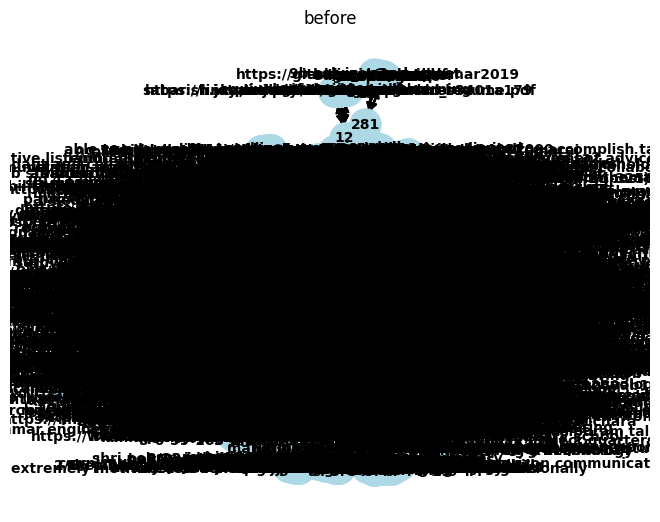

Entry key

 {'resume_id': 0, 'name': 'KARAN AHUJA', 'current_role': 'Advance Application Engineering Analyst', 'linkedin': 'https://www.linkedin.com/in/karan-ahuja-1bb21617a', 'board_of_study': 'CBSE', 'educational_course': 'Mechanical Engineering', 'institute': ['National Institute of Technology', 'Modern Vidya Niketan', 'Vidya Niketan School'], 'phone_number': 8571015682.0, 'email': 'karan.619.ahuja@gmail.com', 'filename': '21263.pdf', 'house_no_and_street': '2C 68 NIT', 'country': 'India', 'postal_code': '121001', 'region': 'Faridabad, Haryana', 'skills': ['C++', 'Java', 'Spring', 'Object Oriented Programming', 'Data Structures and Algorithms', 'Database Management Systems', 'Android App Development System', 'Web Technologies', 'AutoCAD', 'SolidWorks'], 'personal_skills': ['Communication', 'Leadership qualities', 'Teamwork', 'Ability to build relations', 'Outgoing nature'], 'past_roles': ['C++ Master Course', 'Research & Development Internship'], 'past_organizations': ['Accenture', 

In [ ]:
graph = load_graph_2()

first_candidate_id = list(graph.nodes())[0]

first_candidate_details = get_candidate_details(graph, first_candidate_id)


<ipython-input-98-80dbdb43c924>:85: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['resume_id'] = [i for i in range(0, len(df))]


typeee object
Total time taken in seconds: 3.648


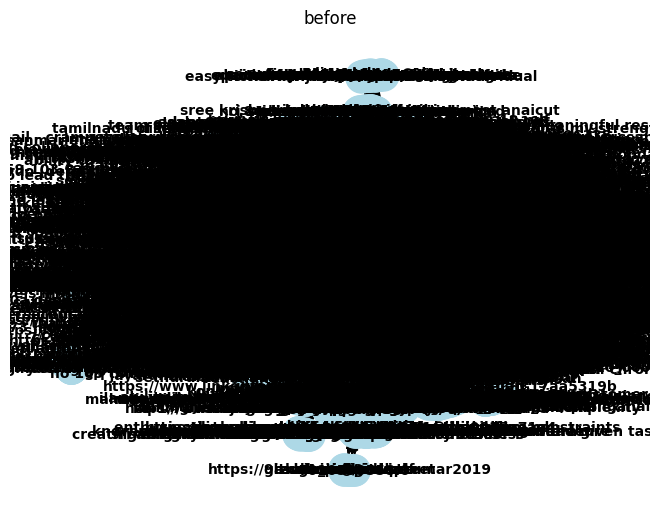

Entry key

 {'resume_id': 0, 'name': 'KARAN AHUJA', 'current_role': 'Advance Application Engineering Analyst', 'linkedin': 'https://www.linkedin.com/in/karan-ahuja-1bb21617a', 'board_of_study': 'CBSE', 'educational_course': 'Mechanical Engineering', 'institute': ['National Institute of Technology', 'Modern Vidya Niketan', 'Vidya Niketan School'], 'phone_number': 8571015682.0, 'email': 'karan.619.ahuja@gmail.com', 'filename': '21263.pdf', 'house_no_and_street': '2C 68 NIT', 'country': 'India', 'postal_code': '121001', 'region': 'Faridabad, Haryana', 'skills': ['C++', 'Java', 'Spring', 'Object Oriented Programming', 'Data Structures and Algorithms', 'Database Management Systems', 'Android App Development System', 'Web Technologies', 'AutoCAD', 'SolidWorks'], 'personal_skills': ['Communication', 'Leadership qualities', 'Teamwork', 'Ability to build relations', 'Outgoing nature'], 'past_roles': ['C++ Master Course', 'Research & Development Internship'], 'past_organizations': ['Accenture', 

In [ ]:
graph = load_graph_2()

candidates_details = []

for candidate_id in [0,1,2]:
    candidate_details = get_candidate_details(graph, candidate_id)

for candidate_detail in candidates_details:
    print(candidate_detail)
